<a href="https://colab.research.google.com/github/eshnil2000/google-colab/blob/master/deep_learn_on_blockchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install required modules
#Install and import all required modules

!git clone https://github.com/eshnil2000/google-colab.git
%cd google-colab
#prepare for eth-brownie installation
!apt-get install libsnappy-dev
!pip install python-snappy
#install eth-brownie---MAKE SURE VERSION IS 1.0.0b7
!pip uninstall typing-extensions -y
!pip install typing-extensions==3.7.4.1
!pip install eth-brownie==1.0.0b7
#install solidity compiler
!pip install py-solc-x
import solcx
#!apt-get install solc
from solcx import get_solc_version, set_solc_version
# set these versions if contracts are written in older versions
solcx.install_solc('v0.4.19')
set_solc_version('v0.4.19')

#install node, npm, ganache-cli. eth-brownie relies on ganache-cli
!apt-get install nodejs-dev node-gyp libssl1.0-dev
!apt-get install npm
!npm install n --g
!n 10.15.3
!npm install ganache-cli -g

#install web3 to interact with ganache-cli
!pip install web3
import web3
from web3 import Web3

#compile the contracts
#!brownie compile



fatal: destination path 'google-colab' already exists and is not an empty directory.
/content/google-colab
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsnappy-dev is already the newest version (1.1.7-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
solc v0.4.19 already installed at: /usr/local/lib/python3.6/dist-packages/solcx/bin/solc-v0.4.19
Checking installed executable version @ /usr/local/lib/python3.6/dist-packages/solcx/bin/solc-v0.4.19
Executing: /usr/local/lib/python3.6/dist-packages/solcx/bin/solc-v0.4.19 --version
solc v0.4.19 successfully installed at: /usr/local/lib/python3.6/dist-packages/solcx/bin/solc-v0.4.19
Using solc version v0.4.19
Reading package lists... Done
Building dependency tree       
Reading state information... Done
node-gyp is already the newest versio

In [0]:

#launch blockchain
!brownie console &


Brownie v1.0.0b10 - Python development framework for Ethereum

Using solc version v0.4.19
Compiling contracts...
Optimizer: Enabled  Runs: 200
Generating build data...
 - Danku_demo_final...
Launching 'ganache-cli'...
Brownie environment is ready.
>>> 

In [1]:
#Import required modules & files
%rm -rf /content/google-colab/
!git clone https://github.com/eshnil2000/google-colab.git
!pip install pandas matplotlib tensorflow numpy
%tensorflow_version 1.13.1
%cd google-colab
!brownie compile

import web3
from web3 import Web3
from brownie import network
network.connect('development')
web3=network.web3
#web3 = Web3(Web3.HTTPProvider("http://localhost:8545",request_kwargs={'timeout':60}))
web3.isConnected()

import config as cfg
cfg.DEBUG='TRUE'
import json

#Read in the contract
with open('contracts/Danku_demo_final.json') as json_file:  
    data = json.load(json_file)


Cloning into 'google-colab'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 357 (delta 41), reused 0 (delta 0), pack-reused 265
Receiving objects: 100% (357/357), 31.74 MiB | 33.78 MiB/s, done.
Resolving deltas: 100% (170/170), done.
/content/google-colab
Brownie v1.0.0b10 - Python development framework for Ethereum

Using solc version v0.4.19
Compiling contracts...
Optimizer: Enabled  Runs: 200
Generating build data...
 - Danku_demo_final...
Brownie project has been compiled at /content/google-colab/build/contracts


In [31]:
#Check if connected to the blockchain
print("Are we Connected to the local blockchain node?: ",web3.isConnected())

#Prepare the contract for deployment
web3.eth.defaultAccount=web3.eth.accounts[1]
myContract = web3.eth.contract(abi=data['abi'], bytecode=data['bytecode'])


Are we Connected to the local blockchain node?:  True


In [0]:
tx_hash=myContract.constructor().transact()

In [0]:
#Confirmation of contract deployment
tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)

In [0]:
# Create a handle to the contract instance with the newly-deployed address
myContractaddress = web3.eth.contract(
    address=tx_receipt.contractAddress,
    abi=data['abi'],
)

In [0]:
#Install modules to read in training data, prepare Neural Network
from dutils.dataset import DemoDataset
from dutils.neural_network import NeuralNetwork
import dutils.debug as dbg
from secrets import randbelow
from matplotlib import pyplot as plt
import numpy as np

In [0]:
#Split data into training & test sets
scd = DemoDataset(training_percentage=0.8,partition_size=5)
#Generate Unique number for each partition
scd.generate_nonce()
#COmpute the unique hash of each group of data in each of the partitions
scd.sha_all_data_groups()


In [35]:
print("The input data is\n",scd.data)
print("The data is of length:", len(scd.data), " and split up into ",scd.num_data_groups, " data partitions")
print("Each partition has a nonces/unique number \n",scd.nonce)
print("Hashed byte value of each partition \n")
print(scd.hashed_data_group)
print("The number of training groups\n",scd.num_train_data_groups)
print("Training data in format (latitude,longitude,party_voted):")
print(scd.train_data)

The input data is
 [(38377411, -121444429, 0), (32597482, -92708389, 1), (34032383, -119134300, 0), (37589246, -82945214, 1), (40507729, -80565292, 1), (33180820, -85941752, 1), (41420210, -83316860, 1), (36189441, -119851865, 1), (39798287, -88727157, 1), (42581749, -94030651, 1), (35520244, -84825054, 1), (35313130, -77177912, 1), (46984699, -95099350, 1), (36864233, -87409139, 1), (44104905, -83865674, 1), (31762219, -83876179, 1), (42490846, -112836032, 1), (39332488, -119613509, 1), (38281095, -87377340, 1), (33904480, -84862139, 1), (37398617, -83704908, 1), (31694842, -106299987, 0), (43031413, -85550267, 1), (46315267, -119371393, 1), (45978288, -108194508, 1), (44601118, -107788860, 1), (34532713, -85368362, 1), (35179148, -91259428, 1), (33978738, -91699077, 1), (30856633, -83526479, 1), (44991024, -123209356, 1), (45869606, -92302860, 1), (34603933, -96420055, 1), (40710521, -93130436, 1), (33435022, -83626885, 1), (42586029, -76801671, 1), (38122662, -85103096, 1), (4383961

In [0]:
offer_account = web3.eth.accounts[1]
solver_account = web3.eth.accounts[2]
_hashed_data_groups = []
accuracy_criteria = 5000 # 50.00%
#total_gas_used = 0
timeout = 180
w_scale = 1000 # Scale up weights by 1000x
b_scale = 1000 # Scale up biases by 1000x

In [37]:
print('My contract is deployed at address: ', myContractaddress.address)

My contract is deployed at address:  0x2Bb749822255014A662956183a5D6c3E8Ff24712


In [38]:
#Check initial balances
print('initial balance of the Primary Challenge Offerer account is: ', web3.eth.getBalance(offer_account))
print('initial balance of the Solver  account is: ', web3.eth.getBalance(solver_account))
print('initial balance of the COntract  account is: ', web3.eth.getBalance(myContractaddress.address))




initial balance of the Primary Challenge Offerer account is:  99801888960000000000
initial balance of the Solver  account is:  100000000000000000000
initial balance of the COntract  account is:  0


In [39]:
# Fund contract
fund_tx = web3.eth.sendTransaction({
    'from': offer_account,
    'to': myContractaddress.address,
    'value': web3.toWei(1, "ether")
})
print('After funding, balance of the COntract  account is: ', web3.eth.getBalance(myContractaddress.address))
print('After funding, balance of the Primary Challenge Offerer account is: ', web3.eth.getBalance(offer_account))


After funding, balance of the COntract  account is:  1000000000000000000
After funding, balance of the Primary Challenge Offerer account is:  98801468160000000000


In [0]:
init1_tx=myContractaddress.functions.init1(scd.hashed_data_group, accuracy_criteria,offer_account)
init1_tx_hash=init1_tx.transact()

init2_tx=myContractaddress.functions.init2().transact()


In [0]:
# Get training & testing partition numbers from the Contract. These are randomly generated on the contract
training_partition = list(map(lambda x: myContractaddress.functions.training_partition(x).call(),range(scd.num_train_data_groups)))
testing_partition = list(map(lambda x: myContractaddress.functions.training_partition(x).call(),range(scd.num_test_data_groups)))
scd.partition_dataset(training_partition, testing_partition)


In [42]:
def scale_packed_data(data, scale):
    # Scale data and convert it to an integer
    return list(map(lambda x: int(x*scale), data))

training_nonces = []
training_data = []
for i in training_partition:
    training_nonces.append(scd.nonce[i])
# Pack data into a 1-dimension array
# Since the data array is too large, we're going to send them in single data group chunks
train_data = scd.pack_data(scd.train_data)
test_data = scd.pack_data(scd.test_data)

init3_tx = []
for i in range(len(training_partition)):
    start = i*scd.dps*scd.partition_size
    end = start + scd.dps*scd.partition_size
    dbg.dprint("(" + str(training_partition[i]) + ") Train data,nonce: " + str(train_data[start:end]) + "," + str(scd.train_nonce[i]))
    iter_tx = myContractaddress.functions.init3(train_data[start:end], scd.train_nonce[i])
    iter_receipt = iter_tx.transact()
    init3_tx.append(iter_tx)


(1) Train data,nonce: [33180820, -85941752, 1, 41420210, -83316860, 1, 36189441, -119851865, 1, 39798287, -88727157, 1, 42581749, -94030651, 1],1468405202

(5) Train data,nonce: [44991024, -123209356, 1, 45869606, -92302860, 1, 34603933, -96420055, 1, 40710521, -93130436, 1, 33435022, -83626885, 1],474851416

(8) Train data,nonce: [44601118, -107788860, 1, 34532713, -85368362, 1, 35179148, -91259428, 1, 33978738, -91699077, 1, 30856633, -83526479, 1],133121983

(3) Train data,nonce: [34706724, -112397730, 1, 40407173, -75984901, 1, 44580923, -95883387, 1, 38176762, -85521751, 0, 38890378, -89314242, 1],3545040475

(6) Train data,nonce: [42586029, -76801671, 1, 38122662, -85103096, 1, 43839613, -88543924, 1, 48290933, -101111794, 1, 40112009, -100106003, 1],474734795

(4) Train data,nonce: [27660127, -98517875, 0, 42321218, -104722426, 1, 38531698, -84035565, 1, 39771372, -77627020, 1, 40712066, -85468798, 1],877373490

(7) Train data,nonce: [37398617, -83704908, 1, 31694842, -106299987

In [43]:
# Get the training data from the contract
contract_train_data_length = myContractaddress.functions.get_train_data_length().call()
contract_train_data = []
for i in range(contract_train_data_length):
    for j in range(scd.dps):
        contract_train_data.append(myContractaddress.functions.train_data(i,j).call())
contract_train_data = scd.unpack_data(contract_train_data)
dbg.dprint("Contract training data: " + str(contract_train_data))

Contract training data: [(33180820, -85941752, 1), (41420210, -83316860, 1), (36189441, -119851865, 1), (39798287, -88727157, 1), (42581749, -94030651, 1), (44991024, -123209356, 1), (45869606, -92302860, 1), (34603933, -96420055, 1), (40710521, -93130436, 1), (33435022, -83626885, 1), (44601118, -107788860, 1), (34532713, -85368362, 1), (35179148, -91259428, 1), (33978738, -91699077, 1), (30856633, -83526479, 1), (34706724, -112397730, 1), (40407173, -75984901, 1), (44580923, -95883387, 1), (38176762, -85521751, 0), (38890378, -89314242, 1), (42586029, -76801671, 1), (38122662, -85103096, 1), (43839613, -88543924, 1), (48290933, -101111794, 1), (40112009, -100106003, 1), (27660127, -98517875, 0), (42321218, -104722426, 1), (38531698, -84035565, 1), (39771372, -77627020, 1), (40712066, -85468798, 1), (37398617, -83704908, 1), (31694842, -106299987, 0), (43031413, -85550267, 1), (46315267, -119371393, 1), (45978288, -108194508, 1), (35520244, -84825054, 1), (35313130, -77177912, 1), (46

In [44]:
#Neural Network structure
il_nn = 2  #Input layer
hl_nn = [] # hidden layers
ol_nn = 2 # output layer
#End Neural Network structure

# Train a neural network with contract data
nn = NeuralNetwork(il_nn, hl_nn, ol_nn, 0.001, 5, 5, 1)
contract_train_data = nn.binary_2_one_hot(contract_train_data)
nn.load_train_data(contract_train_data)
nn.init_network()
nn.train()
trained_weights = nn.weights
trained_biases = nn.bias

Step 1, Loss= 149581520.0000, Training Accuracy= 0.000

Step 2, Loss= 154462256.0000, Training Accuracy= 0.000

Step 3, Loss= 141640416.0000, Training Accuracy= 0.000

Step 4, Loss= 120016832.0000, Training Accuracy= 0.200

Step 5, Loss= 153178752.0000, Training Accuracy= 0.000

Training Finished!

Saving weights...

Weights saved!



In [45]:
dbg.dprint("Trained weights: " + str(trained_weights))
dbg.dprint("Trained biases: " + str(trained_biases))

packed_trained_weights = nn.pack_weights(trained_weights)
dbg.dprint("Packed weights: " + str(packed_trained_weights))

packed_trained_biases = nn.pack_biases(trained_biases)
dbg.dprint("Packed biases: " + str(packed_trained_biases))

int_packed_trained_weights = scale_packed_data(packed_trained_weights,\
        w_scale)
dbg.dprint("Packed integer weights: " + str(int_packed_trained_weights))

int_packed_trained_biases = scale_packed_data(packed_trained_biases,\
        b_scale)
dbg.dprint("Packed integer biases: " + str(int_packed_trained_biases))

dbg.dprint("Solver address: " + str(solver_account))

Trained weights: [array([[ 1.534128  , -0.42900813],
       [-0.23927125,  0.53085786]], dtype=float32)]

Trained biases: [array([ 0.81253403, -1.584769  ], dtype=float32)]

Packed weights: [1.534128, -0.42900813, -0.23927125, 0.53085786]

Packed biases: [0.81253403, -1.584769]

Packed integer weights: [1534, -429, -239, 530]

Packed integer biases: [812, -1584]

Solver address: 0xF272bAa1644A5DEf49e781bC946aaE8E0584b3A0



In [46]:
current_level=myContractaddress.functions.init_level().call()
#dbg.dprint(str(current_level))
solver_account=web3.eth.accounts[0]
# Submit the solution to the contract
submit_tx = myContractaddress.functions.submit_model(solver_account, il_nn, ol_nn, hl_nn,int_packed_trained_weights, int_packed_trained_biases).transact()
dbg.dprint("Submit TX: " + str(submit_tx))


Submit TX: b'%X\xe6\x8b\xe2\xdf\x0f%\x1cjVZ\x0ca\xe0P\x18\xfd\xa0w\xe0E\xdf\xa1\x90\xb7\xb6\x93\xad\x9dV\x03'



In [47]:
# Reveal the testing dataset after the submission period ends
reveal_tx = []
for i in range(len(testing_partition)):
    start = i*scd.dps*scd.partition_size
    end = start + scd.dps*scd.partition_size
    dbg.dprint("(" + str(testing_partition[i]) + ") Test data,nonce: " + str(test_data[start:end]) + "," + str(scd.test_nonce[i]))
    iter_tx = myContractaddress.functions.reveal_test_data(test_data[start:end], scd.test_nonce[i]).transact()
    dbg.dprint("Reveal test data iter " + str(i) )
    reveal_tx.append(iter_tx)

(1) Test data,nonce: [33180820, -85941752, 1, 41420210, -83316860, 1, 36189441, -119851865, 1, 39798287, -88727157, 1, 42581749, -94030651, 1],1468405202

Reveal test data iter 0

(5) Test data,nonce: [44991024, -123209356, 1, 45869606, -92302860, 1, 34603933, -96420055, 1, 40710521, -93130436, 1, 33435022, -83626885, 1],474851416

Reveal test data iter 1



In [48]:
# Finalize the contract
final_tx = myContractaddress.functions.finalize_contract().transact()
contract_finalized = myContractaddress.functions.contract_terminated().call()
dbg.dprint("Contract finalized: " + str(contract_finalized))



Contract finalized: True



In [49]:
# Get best submission accuracy & ID
best_submission_accuracy = myContractaddress.functions.best_submission_accuracy().call()
best_submission_index = myContractaddress.functions.best_submission_index().call()

dbg.dprint("Best submission ID: " + str(best_submission_index))
dbg.dprint("Best submission accuracy: " + str(best_submission_accuracy))# Since the data array is too large, we're going to send them in single data group chunks
train_data = scd.pack_data(scd.train_data)
test_data = scd.pack_data(scd.test_data)

#Build the Neural Network
#Number of neurons in input layer
il_nn=2
#Hidden layers: each element represents number of neurons in that layer
hl_nn = []
#Number of neurons in output layer
ol_nn = 2

l_nn = [il_nn] + hl_nn + [ol_nn]
input_layer = train_data[:2]
hidden_layers = [0] * sum(hl_nn)
output_layer = [0] * ol_nn
weights = int_packed_trained_weights
biases = int_packed_trained_biases
# Test forward
fwd_pass2 = myContractaddress.functions.forward_pass2(l_nn, input_layer, hidden_layers, output_layer, weights, biases).call()


Best submission ID: 0

Best submission accuracy: 0



In [50]:
dbg.dprint("Test input: " + str(train_data[:2]))
dbg.dprint("Expected output: " + str(train_data[2]))
dbg.dprint("local nn prediction: " + str(nn.predict([train_data[:2]])))

dbg.dprint("forward_pass2: " + str(fwd_pass2))

#dbg.dprint("Total gas used: " + str(total_gas_used))

Test input: [33180820, -85941752]

Expected output: 1

local nn prediction: [[-1.0328041e+08  1.7216830e+07]]

forward_pass2: [8776839, 0]



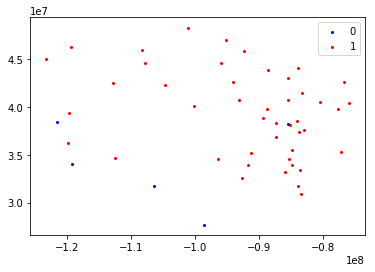

In [51]:
# Import the required modules, plot the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

scatter_x = np.array(list(map(lambda x: x[1:2][0], scd.data)))
scatter_y = np.array(list(map(lambda x: x[:1][0], scd.data)))
group = np.array(list(map(lambda x: x[2:3][0], scd.data)))
cdict = {0: "blue", 1: "red"}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 4)
ax.legend()
plt.show()


In [52]:
#Check initial balances
print('Final balance of the Primary Challenge Offerer account is: ', web3.eth.getBalance(offer_account))
print('Final balance of the Solver  account is: ', web3.eth.getBalance(solver_account))
print('Final balance of the COntract  account is: ', web3.eth.getBalance(myContractaddress.address))


Final balance of the Primary Challenge Offerer account is:  99706639320000000000
Final balance of the Solver  account is:  100000000000000000000
Final balance of the COntract  account is:  0


In [0]:
#NOTE: Challenge Offerer is refunded Contract amount, if solution accuracy criteria is not met